<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Task 3: Visualize the Data
---

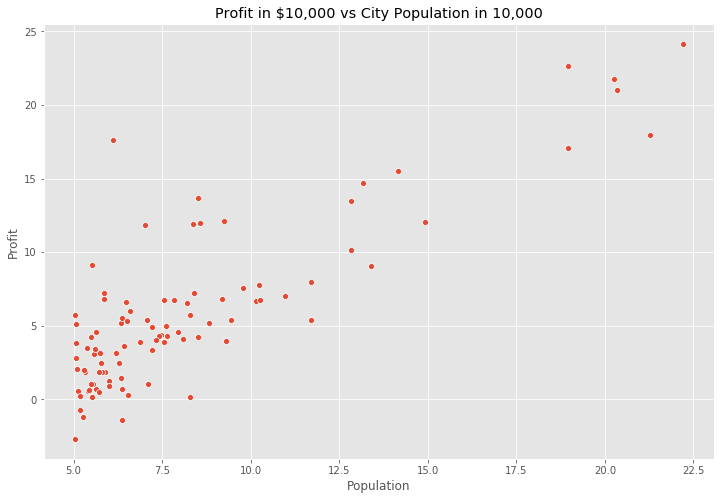

In [4]:
ax = sns.scatterplot(x='Population',y='Profit',data=data)
ax.set_title('Profit in $10,000 vs City Population in 10,000');

In [5]:
 np.corrcoef(data['Population'],data['Profit'])[0,1]

0.837873232526341

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [6]:
def cost_function(X,y,theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y)**2
    return 1/(2*m) * np.sum(error)

In [7]:
m = data.Population.shape[0]
X = np.append(np.ones((m,1)), data.Population.values.reshape(m,1),axis=1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))


In [8]:
cost_function(X,y,theta)

32.072733877455676


My Solution:
* Minimising cost function when $\theta_0$ = 0 and $\theta_1$ = 0


$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$ $=>$ 

$$h_{\theta}(x) = 0 + 0x_1$$ $=>$


$$h_{\theta}(x) = 0$$ 


<br>


$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (y^{(i)} )^2$$

<br>



In [9]:
np.sum(data['Profit'] ** 2) / (2*(data.shape[0])) # y

32.072733877455676

Verify: 


$$h_{\theta}(x) = 0 + 0x_1$$ 

<br>


$$
\begin{bmatrix}
1 & 6.1101 \\
1 & 5.5277 \\
... & ... \\
1 & 5.4369
\end{bmatrix}
*
\begin{bmatrix}
0 \\
0
\end{bmatrix}
= 
\begin{bmatrix}
0 \\
0 \\
...\\
0
\end{bmatrix}
$$



In [10]:
X = np.column_stack(\
    [np.ones((m,1)),\
    data.Population.values.reshape(m,1)
    ])

y = data.Profit.values.reshape(m,1)
cost_function(X,y,theta)

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [25]:
def gradient_descent(X,y,theta,alpha,iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.T, (y_pred - y))
        theta -= alpha * 1/m * error 
        costs.append(cost_function(X,y,theta))
    return theta,costs

In [12]:
theta, costs = gradient_descent(X,y,theta,alpha=0.01,iterations=2000)

In [13]:
"h(x) = {} + {} * 1".format(
    str(round(theta[0,0],2)),
    str(round(theta[1,0],2))
)

'h(x) = -3.79 + 1.18 * 1'

Object `dot` not found.


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [19]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0),len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i],theta_1[j]])
        cost_values[i,j] = cost_function(X,y,t)
        

In [16]:
cost_values.shape

(100, 100)

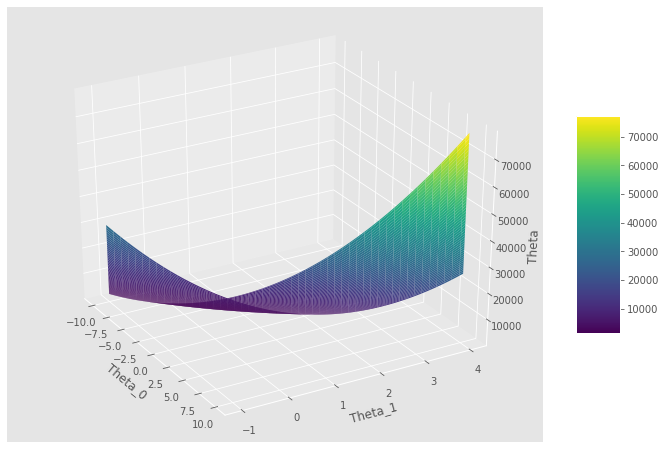

In [20]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(theta_0,theta_1,cost_values,cmap='viridis')
fig.colorbar(surf,shrink=0.5,aspect=5)

plt.xlabel('Theta_0')
plt.ylabel('Theta_1')
ax.set_zlabel('Theta')
ax.view_init(30,330)

plt.show()

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of the Cost Function over Iterations of Gradient Descent')

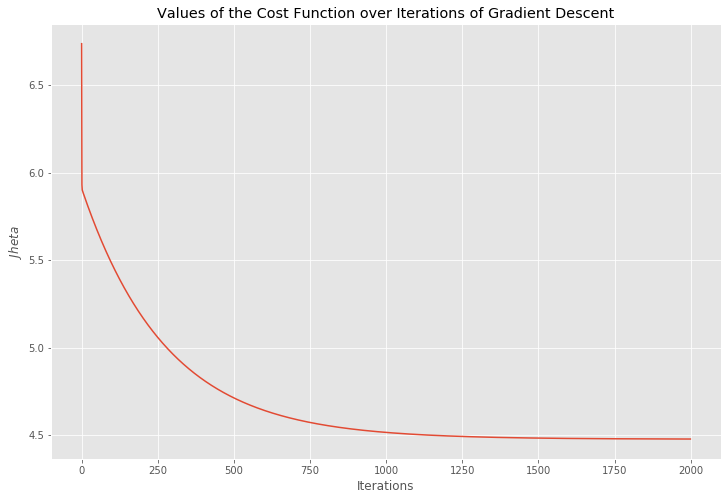

In [37]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J \theta $')
plt.title('Values of the Cost Function over Iterations of Gradient Descent')

### Task 8: Training Data with Linear Regression Fit
---

In [39]:
theta

array([[-3.78806857],
       [ 1.18221277]])

In [38]:
np.squeeze(theta)

array([-3.78806857,  1.18221277])

Text(0.5, 0, 'Population')

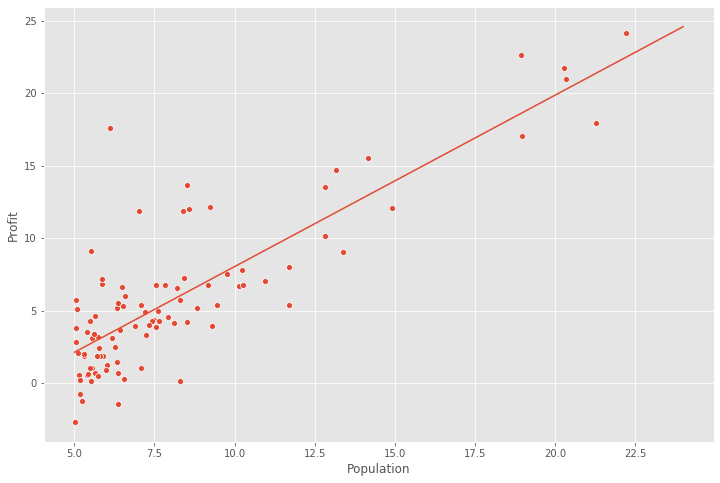

In [41]:
theta = np.squeeze(theta)
sns.scatterplot(x='Population',y='Profit',data=data)

x_value = [x for x in range(5,25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]

sns.lineplot(x_value,y_value)

plt.xlabel('Population')

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [50]:
theta.reshape(2,1).T

array([[-3.78806857,  1.18221277]])

In [48]:
theta.transpose()

array([-3.78806857,  1.18221277])

In [51]:
theta

array([-3.78806857,  1.18221277])

In [52]:
def predict(x,theta):
    y_pred = np.dot(theta,x)
    return y_pred

In [53]:
predict(np.array([1,4]), theta) * 10000 # for 40,000

9407.82526306397